
# Comparison of a tRNA-like-structure with a tRNA

In this example we plot a secondary-structure diagram of a tRNA mimic 
(PDB ID: 4P5J) from the *turnip yellow mosaic virus* (TYMV) and compare
it to a PHE-tRNA (PDB ID: 1EHZ).


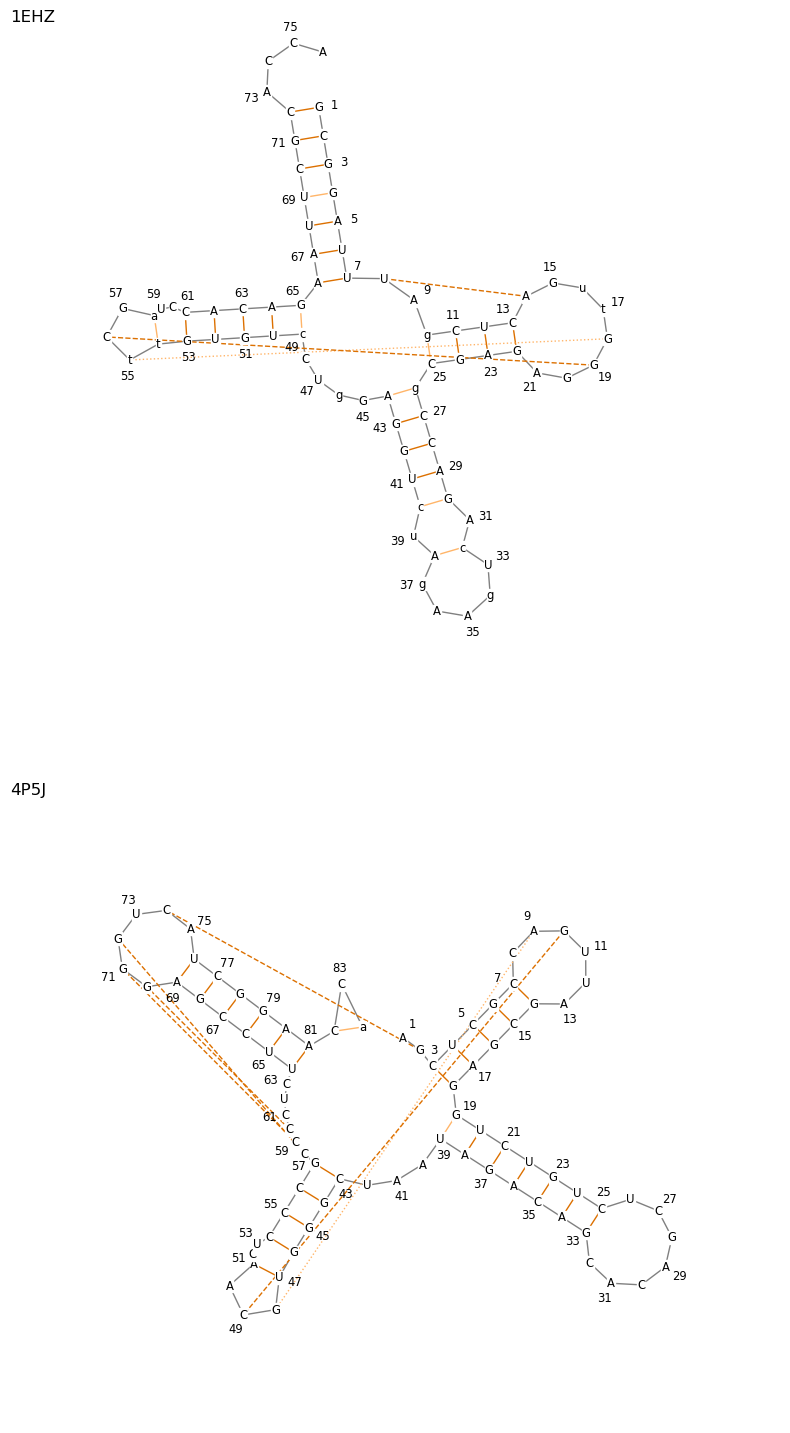

In [2]:
# Code source: Tom David Müller
# License: BSD 3 clause

from tempfile import gettempdir
import biotite
import biotite.structure.io.pdb as pdb
import biotite.database.rcsb as rcsb
import biotite.structure as struc
import biotite.structure.graphics as graphics
import matplotlib.pyplot as plt
import numpy as np

# Create a function to get the structures and compute information for 
# the plots.
def plot_rna(pdb_id, axes):
    # Download the PDB file and read the structure
    pdb_file_path = rcsb.fetch(pdb_id, "pdb", gettempdir())
    pdb_file = pdb.PDBFile.read(pdb_file_path)
    atom_array = pdb.get_structure(pdb_file)[0]
    nucleotides = atom_array[struc.filter_nucleotides(atom_array)]

    # Compute the base pairs and their pseudoknot order
    base_pairs = struc.base_pairs(nucleotides)
    base_pairs = struc.get_residue_positions(
        nucleotides, base_pairs.flatten()
    ).reshape(base_pairs.shape)
    pseudoknot_order = struc.pseudoknots(base_pairs)[0]

    # Set the linestyle according to the pseudoknot order
    linestyles = np.full(base_pairs.shape[0], '-', dtype=object)
    linestyles[pseudoknot_order == 1] = '--'
    linestyles[pseudoknot_order == 2] = ':'

    # Indicate canonical nucleotides with an upper case one-letter-code
    # and non-canonical nucleotides with a lower case one-letter-code
    base_labels = []
    for base in struc.residue_iter(nucleotides):
        one_letter_code, exact = struc.map_nucleotide(base)
        if exact:
            base_labels.append(one_letter_code)
        else:
            base_labels.append(one_letter_code.lower())

    # Color canonical Watson-Crick base pairs with a darker orange and
    # non-canonical base pairs with a lighter orange
    colors = np.full(base_pairs.shape[0], biotite.colors['brightorange'])
    for i, (base1, base2) in enumerate(base_pairs):
        name1 = base_labels[base1]
        name2 = base_labels[base2]
        if sorted([name1, name2]) in [["A", "U"], ["C", "G"]]:
            colors[i] = biotite.colors["dimorange"]

    # Plot the secondary structure
    graphics.plot_nucleotide_secondary_structure(
        axes, base_labels, base_pairs, struc.get_residue_count(nucleotides),
        pseudoknot_order=pseudoknot_order, bond_linestyle=linestyles,
        bond_color=colors,
        # Margin to compensate for reduced axis limits in shared axis
        border=0.13
    )

    # Use the PDB ID to label each plot
    axes.set_title(pdb_id, loc="left")

# Create a matplotlib pyplot
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8.0, 16.0),
    # Share both axes to ensure eqaul scaling of bath secondary structures
    sharex=True, sharey=True
)

# Plot the secondary structures
plot_rna('1EHZ', ax1)
plot_rna('4P5J', ax2)
fig.tight_layout()

plt.show()

The generated plots show that both structures consist of four hairpin 
loops. Two of those loops, which are opposite to each other, interact 
through two pseudoknotted base pairs in the otherwise unpaired loop of 
the respective hairpin structures. The fact that this interaction was 
mimicked indicates functional importance. 

A third hairpin loop is folded towards the centre of the tRNA mimic. 
This is not the case for the phenylalanine tRNA and thus signifies a 
major difference between the structures.
